# CodeCademy Final Portfolio Project
The goal of this project was to use machine learning to evaluate how dripwater d18O is explained by temperature and precipitation d18O. I will use the supervised machine learning technique: multivariate linear regression. I will train and test the machine learning model on a dataset from the literature (Baker et al., 2019; Nature). I will then evaluate the model by using it to predict dripwater d18O from isotope enable climate model data as presented in Tabor et al. (in revision) and compare the predicted dripwater d18O to the predicted dripwater d18O from a forward proxy system model, Karstolution (Treble et al., 2019). 

Citations are at the end of this notebook. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
monitorDF = pd.read_csv('TestML.csv')

In [4]:
print(monitorDF.head())

    MAT  P_PET  d18Op  d18Odw
0  18.2   0.45  -4.34   -2.81
1  18.2   0.45  -4.34   -2.50
2  18.2   0.45  -4.34   -3.45
3  18.2   0.45  -4.34   -2.43
4  18.2   0.45  -4.34   -1.98


In [5]:
x = monitorDF[['MAT', 'P_PET', 'd18Op']]
y = monitorDF[['d18Odw']]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=6)

In [7]:
lm = LinearRegression()

In [8]:
model = lm.fit(x_train, y_train)

Train score:
0.8359053580576565
Test score:
0.8453057456372484


Text(0.5, 1.0, 'Actual dripwater vs. predicted dripwater')

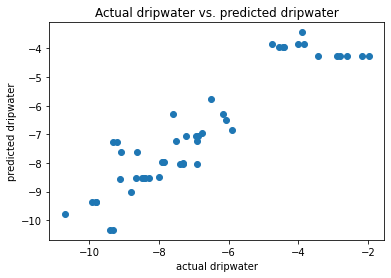

In [9]:
y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)


plt.xlabel("actual dripwater")
plt.ylabel("predicted dripwater")
plt.title("Actual dripwater vs. predicted dripwater")


In [10]:
#now to test on model data
LehmanDF = pd.read_csv('Lehman.csv')
FS_DF = pd.read_csv('FS.csv')
ML_DF = pd.read_csv('ML.csv')
COB_DF = pd.read_csv('COB.csv')
CWN_DF = pd.read_csv('CWN.csv')
Shasta_DF = pd.read_csv('Shasta.csv')

In [11]:
#current thinking is not to calculate annual averages because Karstolution will do monthly values.


In [12]:
LehmanDF['P_PET'] = LehmanDF['Precip']/LehmanDF['Evap']
LehmanDF['MAT'] = LehmanDF['TS'] -273.15
FS_DF['P_PET'] = FS_DF['Precip']/FS_DF['Evap']
FS_DF['MAT'] =  FS_DF['TS'] -273.15
ML_DF['P_PET'] = ML_DF['Precip']/ML_DF['Evap']
ML_DF['MAT'] = ML_DF['TS'] -273.15
COB_DF['P_PET'] = COB_DF['Precip']/COB_DF['Evap']
COB_DF['MAT'] = COB_DF['TS'] -273.15
CWN_DF['P_PET'] = CWN_DF['Precip']/CWN_DF['Evap']
CWN_DF['MAT'] = CWN_DF['TS'] -273.15
Shasta_DF['P_PET'] = Shasta_DF['Precip']/Shasta_DF['Evap']
Shasta_DF['MAT'] = Shasta_DF['TS'] -273.15


In [13]:
Lehman = LehmanDF[['MAT', 'P_PET', 'd18O']]
FS = FS_DF[['MAT', 'P_PET', 'd18O']]
ML = ML_DF[['MAT', 'P_PET', 'd18O']]
COB = COB_DF[['MAT', 'P_PET', 'd18O']]
CWN = CWN_DF[['MAT', 'P_PET', 'd18O']]
Shasta = Shasta_DF[['MAT', 'P_PET', 'd18O']]

In [14]:
Lehman = Lehman.rename(columns = {'d18O': 'd18Op'})
FS = FS.rename(columns = {'d18O': 'd18Op'})
ML = ML.rename(columns = {'d18O': 'd18Op'})
COB = COB.rename(columns = {'d18O': 'd18Op'})
CWN = CWN.rename(columns = {'d18O': 'd18Op'})
Shasta = Shasta.rename(columns = {'d18O': 'd18Op'})
print(Lehman.head())



         MAT     P_PET      d18Op
0  -1.348853  2.267838 -15.753865
1   1.187006  1.302662 -15.802324
2   6.111566  1.309865 -14.062405
3   8.135828  0.997939 -12.133062
4  13.653101  0.811143 -13.121843


In [15]:
#need to average this to annual values.
n = 12

columns = list(Lehman)
newLehman = pd.DataFrame({'counts': range(45)})
newFS = pd.DataFrame({'counts': range(45)})
newML = pd.DataFrame({'counts': range(45)})
newCOB = pd.DataFrame({'counts': range(45)})
newCWN = pd.DataFrame({'counts': range(45)})
newShasta = pd.DataFrame({'counts': range(45)})


for i in columns:
    arraytest = FS[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newFS[i] = avgResult.tolist()
    
for i in columns:
    arraytest = ML[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newML[i] = avgResult.tolist()

for i in columns:
    arraytest = COB[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newCOB[i] = avgResult.tolist()

for i in columns:
    arraytest = CWN[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newCWN[i] = avgResult.tolist()
    
for i in columns:
    arraytest = Lehman[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newLehman[i] = avgResult.tolist()
    
for i in columns:
    arraytest = Shasta[i].to_numpy()
    avgResult = np.average(arraytest.reshape(-1,n), axis=1)
    newShasta[i] = avgResult.tolist()
    
    
newLehman = newLehman[['MAT', 'P_PET', 'd18Op']]
newFS = newFS[['MAT', 'P_PET', 'd18Op']]
newML = newML[['MAT', 'P_PET', 'd18Op']]
newCOB = newCOB[['MAT', 'P_PET', 'd18Op']]
newCWN = newCWN[['MAT', 'P_PET', 'd18Op']]
newShasta = newShasta[['MAT', 'P_PET', 'd18Op']]

In [16]:
predict_lehman = lm.predict(newLehman)
predict_FS = lm.predict(newFS)
predict_ML = lm.predict(newML)
predict_COB = lm.predict(newCOB)
predict_CWN = lm.predict(newCWN)
predict_Shasta = lm.predict(newShasta)

In [17]:
#now to compare the predicted with multiple linear regression with the Karstolution predicted values
karst_Lehman = pd.read_csv('Lehman_output_0ka.csv')
karst_ML = pd.read_csv('ML_output_0ka.csv')
karst_FS = pd.read_csv('FS_output_0ka.csv')
karst_COB = pd.read_csv('COB_output_0ka.csv')
karst_CWN = pd.read_csv('CWN_output_0ka.csv')
karst_Shasta = pd.read_csv('Shasta_output_0ka.csv')

print(karst_Lehman.head())

   Unnamed: 0   tt  mm        f1        f3  f4        f5        f6  f7  \
0         540  541   1  0.000000  0.120806   0  0.431632  0.033923   0   
1         541  542   2  0.442001  0.122417   0  0.430720  0.033855   0   
2         542  543   3  0.465881  0.124193   0  0.429817  0.033787   0   
3         543  544   4  0.371749  0.125188   0  0.428919  0.033720   0   
4         544  545   5  0.214176  0.124906   0  0.428022  0.033652   0   

   soilstor  ...  drip_int_stal5  cave_temp  stal1_growth_rate  \
0  1.898548  ...      465.686549   9.228249           0.072678   
1  1.768003  ...      466.671740   9.233449           0.072600   
2  1.863523  ...      467.652602   9.237227           0.072521   
3  1.486997  ...      468.631512   9.242200           0.072443   
4  0.856705  ...      469.614105   9.241741           0.072359   

   stal2_growth_rate  stal3_growth_rate  stal4_growth_rate  stal5_growth_rate  \
0           0.107465           0.106963           0.039484           0.106546

In [18]:
arraykarst = karst_Lehman.epx18o.to_numpy()
lehmanResult = np.average(arraykarst.reshape(-1,n), axis=1)

#compared = pd.DataFrame({'predicted': predict_lehman, 'karst': lehman_epx})
#print(compared.head())




The average machine learning predicted dripwater d18O value is -13.898237459810561 with a variance of 6.687234787791355 whereas the Karstolution forward model result average is -16.029741885333333 with a variance of 0.09635375693283232.


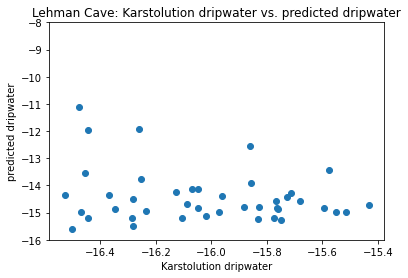

In [35]:
plt.scatter(lehmanResult, predict_lehman)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("Lehman Cave: Karstolution dripwater vs. predicted dripwater")
plt.ylim(-16, -8)

predict_lehman_filt = predict_lehman[predict_lehman < 0]

avg1 = lehmanResult.mean()
avg2 = predict_lehman_filt.mean()

var1 = lehmanResult.var()
var2 = predict_lehman_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg2)+" with a variance of "+str(var2)+" whereas the Karstolution forward model result average is "+str(avg1)+" with a variance of "+str(var1)+".")

The average machine learning predicted dripwater d18O value is -9.635017845832122 with a variance of 0.18777857724922586 whereas the Karstolution forward model result average is -10.468292415648147 with a variance of 0.007889951515664913.


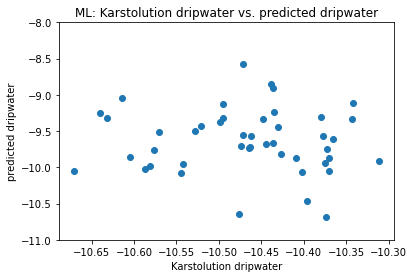

In [37]:
arraykarst2 = karst_ML.epx18o.to_numpy()
MLResult = np.average(arraykarst2.reshape(-1,n), axis=1)


plt.scatter(MLResult, predict_ML)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("ML: Karstolution dripwater vs. predicted dripwater")
plt.ylim(-11, -8)

predict_ML_filt = predict_ML[predict_ML < 0]

avg3 = MLResult.mean()
avg4 = predict_ML_filt.mean()

var3 = MLResult.var()
var4 = predict_ML_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg4)+" with a variance of "+str(var4)+" whereas the Karstolution forward model result average is "+str(avg3)+" with a variance of "+str(var3)+".")

The average machine learning predicted dripwater d18O value is -9.624667409655244 with a variance of 0.4380710733644657 whereas the Karstolution forward model result average is -10.647835943564813 with a variance of 0.14550003781702986.


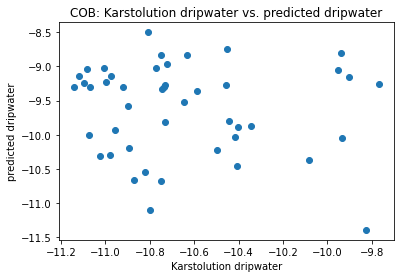

In [38]:
arraykarst3 = karst_COB.epx18o.to_numpy()
COBResult = np.average(arraykarst3.reshape(-1,n), axis=1)


plt.scatter(COBResult, predict_COB)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("COB: Karstolution dripwater vs. predicted dripwater")

predict_COB_filt = predict_COB[predict_COB < 0]

avg5 = COBResult.mean()
avg6 = predict_COB_filt.mean()

var5 = COBResult.var()
var6 = predict_COB_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg6)+" with a variance of "+str(var6)+" whereas the Karstolution forward model result average is "+str(avg5)+" with a variance of "+str(var5)+".")


The average machine learning predicted dripwater d18O value is -6.924096331889218 with a variance of 0.3976619334943455 whereas the Karstolution forward model result average is -8.749912584455556 with a variance of 0.042772736492648206.


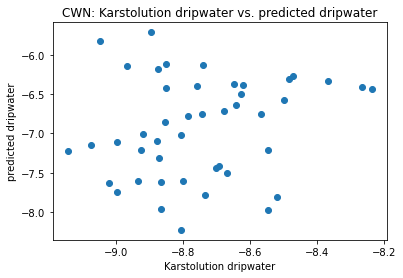

In [39]:
arraykarst4 = karst_CWN.epx18o.to_numpy()
CWNResult = np.average(arraykarst4.reshape(-1,n), axis=1)


plt.scatter(CWNResult, predict_CWN)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("CWN: Karstolution dripwater vs. predicted dripwater")

predict_CWN_filt = predict_CWN[predict_CWN < 0]

avg7 = CWNResult.mean()
avg8 = predict_CWN_filt.mean()

var7 = CWNResult.var()
var8 = predict_CWN_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg8)+" with a variance of "+str(var8)+" whereas the Karstolution forward model result average is "+str(avg7)+" with a variance of "+str(var7)+".")




The average machine learning predicted dripwater d18O value is -9.471618884161337 with a variance of 0.19217557866054738 whereas the Karstolution forward model result average is -10.528834717537034 with a variance of 0.0052578778205954755.


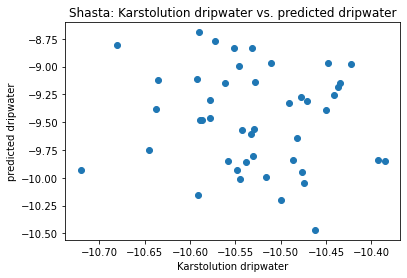

In [40]:
arraykarst5 = karst_Shasta.epx18o.to_numpy()
ShastaResult = np.average(arraykarst5.reshape(-1,n), axis=1)


plt.scatter(ShastaResult, predict_Shasta)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("Shasta: Karstolution dripwater vs. predicted dripwater")

predict_Shasta_filt = predict_Shasta[predict_Shasta < 0]

avg9 = ShastaResult.mean()
avg10 = predict_Shasta_filt.mean()

var9 = ShastaResult.var()
var10 = predict_Shasta_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg10)+" with a variance of "+str(var10)+" whereas the Karstolution forward model result average is "+str(avg9)+" with a variance of "+str(var9)+".")




The average machine learning predicted dripwater d18O value is -12.04500817703751 with a variance of 0.39155773616636186 whereas the Karstolution forward model result average is -12.581685422388889 with a variance of 0.1726352873989282.


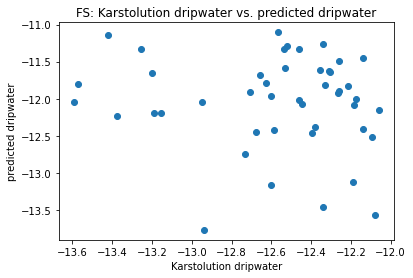

In [41]:
arraykarst6 = karst_FS.epx18o.to_numpy()
FSResult = np.average(arraykarst6.reshape(-1,n), axis=1)


plt.scatter(FSResult, predict_FS)


plt.xlabel("Karstolution dripwater")
plt.ylabel("predicted dripwater")
plt.title("FS: Karstolution dripwater vs. predicted dripwater")

predict_FS_filt = predict_FS[predict_FS < 0]

avg11 = FSResult.mean()
avg12 = predict_FS_filt.mean()

var11 = FSResult.var()
var12 = predict_FS_filt.var()


print("The average machine learning predicted dripwater d18O value is "+str(avg12)+" with a variance of "+str(var12)+" whereas the Karstolution forward model result average is "+str(avg11)+" with a variance of "+str(var11)+".")



In [25]:
#I want to test the variance etc. of both the karstolution results and the machine learning results. 


# Conclusions
The model scored at 83% on the test dataset. The supervised machine learning model agrees pretty well with the Karstolution forward proxy system model, if the data is filtered for outliers. This is an important step in understanding how the data is predicted and highlights our understanding of what controls dripwater d18O values. 